<h1>1단계) 탐색:데이터의 기초 정보 살펴보기</h1>

country = 국가정보

beer_servings = 맥주 소비량

spirit_servings = spirit(양주) 소비량

wine_servings = 와인 소비량

total_litres_of_pure_alcohol = 총 알코올 소비량

continent = 국가의 대륙 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path) #csv는 콤마로 끊어 잇는데 자동으로 되어있음
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<h1>2단계) 인사이트의 발견: 탐색과 시각화</h1>

상관관계로 데이터 분석

1. 단순 상관 분석

피처가 2개일때 상관계수를 계산하는 방법

2. 다중 상관 분석

피처가 2개 이상일때 연관성을 분석하는 방법

상관분석은 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸다

하지만 공분산만으로 두 변수의 상관관계를 구하면 두 변수 단위크기에 영향을 받을 수있으므로,

-1 1 사이의 값으로 변환하여 분석한다.

1에 가까울때는 강한 상관관계(양의 상관관계)고 -1에 가깝다면 약한 상관관계(음의 상관관계)가 있는 것이다.

양의 상관관계를 보인다

In [3]:
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


다중 상관관계 분석

In [4]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


heatmap 그래프 출력
데이터 프레임을 파라미터로 넣어준다.

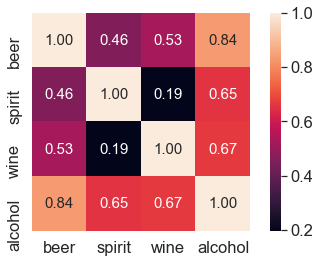

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_view,
                xticklabels=cols_view)

plt.tight_layout()
plt.show()

<h1>pairplot 그래프 출력</h1>

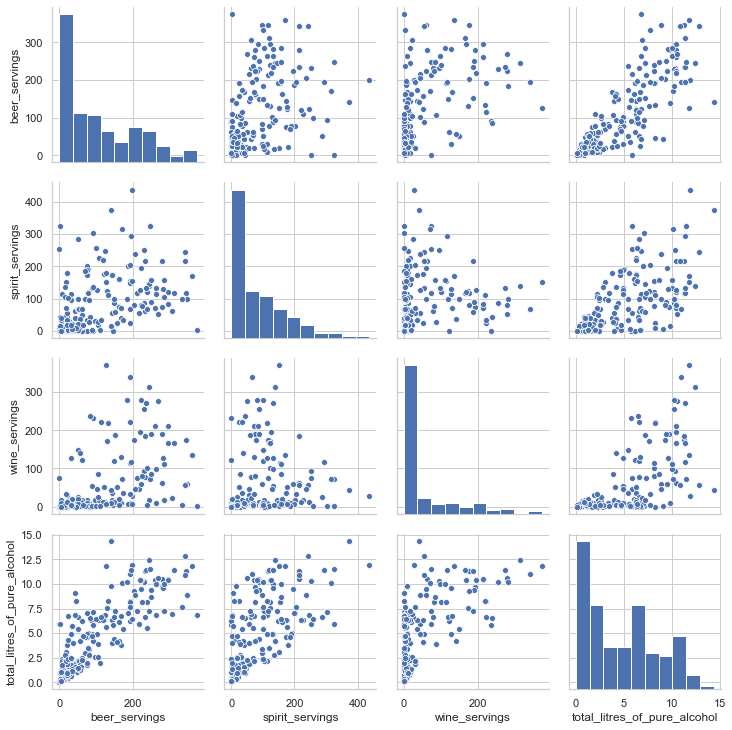

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings',
                    'wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

<h1>3단계) 탐색적 분석: 개념적 탐색 분석</h1>

결측 데이터를 처리해야 함//fillna() 함수를 사용하여 drinks 데이터 프레임에 contnent 피처의 결측값을 OT로 채우는 것이 목적

In [7]:
print(drinks.isnull().sum())
print('--------------------------------')
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
--------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


continent 결측값 전처리

In [8]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


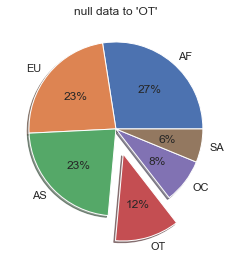

In [9]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.3,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct="%.0f%%", shadow=True)
plt.title('null data to \'OT\'')
plt.show()

<h1>연습문제2</h1>

파이 차트 시각화에는 2개의 코드 라인이 있다. 각각 어떤 값을 갖고 잇는지 결과를 출력한다.

In [10]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()

print(labels)
print(fracs1)

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


<h2>대륙별 spirit_servings의 통계적 정보는 어느정도</h2>

agg()함수를 사용하여 대륙 단위로 분석 수행한다.

agg()함수는 apply()함수와 비슷하지만 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에  얻을 수 있는 함수이다.

In [11]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


<h2>전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?</h2>

전체 평균보다 많은 알콜을 섭취하는 대륙을 탐색할 때는 apply()나 agg() 함수가 없어도 
mean()함수만을 이용한 탐색을 할 수 있다.


In [12]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


<h2>평균 beer_servings 가 가장 높은 대륙은 어디일까?</h2>

mean()함수만을 이용한 탐색이 idxmax() 함수를 적용하면 평균 'beer_servings'가 가장 높은 대륙이 

어디인지 찾을 수 있다. idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환하는 기능을 수행한다.



In [13]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


<h1>시각화 #막대그래프</h1>

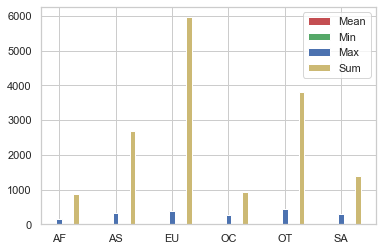

In [14]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                color='r',
                label='Mean')

rects2 = plt.bar(index, mins, bar_width,
                color='g',
                label='Min')

rects3 = plt.bar(index, maxs, bar_width,
                color='b',
                label='Max')

rects4 = plt.bar(index + bar_width *3, sums, bar_width,
                color='y',
                label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()


<h1>대륙별 total_litres_of_pure_alcohol을 시각화</h1>

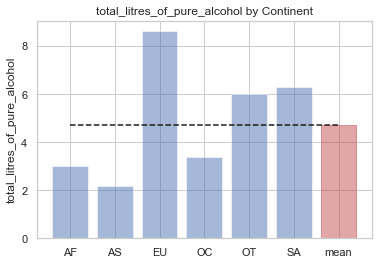

In [15]:
continents = continent_mean.index.tolist()
continents.append('mean')

x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos,continents)

plt.ylabel("total_litres_of_pure_alcohol")
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

<h1>대륙별 beer_servings 시각화</h1>

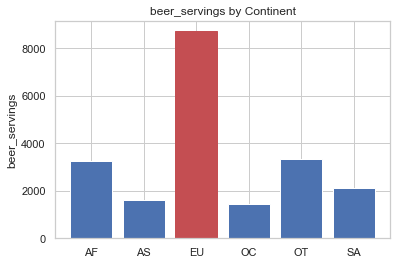

In [16]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center')
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel("beer_servings")
plt.title("beer_servings by Continent")

plt.show()

means = result['mean'].tolist()

mins = result['min'].tolist()

maxs = result['max'].tolist()

sums = result['sum'].tolist()

코드 4개의 차이점 값 차이를 알자

In [17]:
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


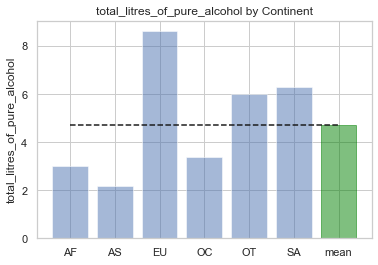

In [18]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents)-1].set_color('green')
plt.plot([0,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos,continents)

plt.ylabel("total_litres_of_pure_alcohol")
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

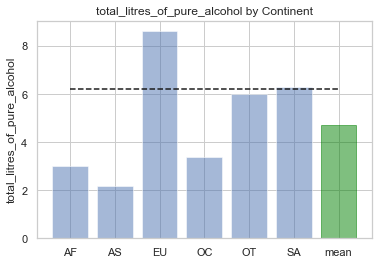

In [19]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents)-1].set_color('green')
plt.plot([0,6], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos,continents)

plt.ylabel("total_litres_of_pure_alcohol")
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [20]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000.


In [21]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


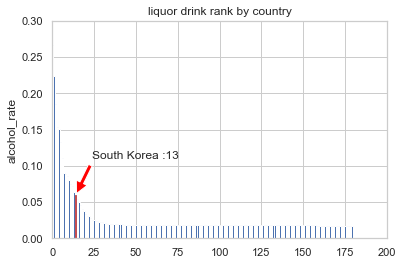

In [22]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list =plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol_rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea :' + str(korea_rank -1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank+10, korea_alc_rate+0.05),
            arrowprops = dict(facecolor='red',shrink=0.05))

plt.show()